# Bonus assignement

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstNameLastName.ipynb`. It should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it. 
- Read each instruction carefully and provide complete answers to each question/task
- You are allowed to use Keras or Pytorch 

> **_NOTE:_**  Write your email address in the cell below

*Your email address here*

### I- Open questions (3 points)

Read [this article](https://link.springer.com/referenceworkentry/10.1007/978-0-387-73003-5_304) and answer the following questions:

1. What is incremental learning?
    - incremental learning is a machine learning paradigm which aims at learning to train a model "incrementally". This is contrasted with a regular approach of training on one big dataset.
    - it has several advantages compared to traditional technics. The advantages are:
      1. It does not require a sufficient training set before learning
      1. It can continuously learn to improve when the system is running
      1. It can adapt to changes of the target concept
      1. It requires less computation and storage resources than learning from scratch
      1. It naturally matches the applications depending on time series 

2. Why is it important for us to create neural networks that would someday be able to learn incrementally?
    - Previously in machine learning it was assumed that training all data on one big dataset was sufficient to train a good model
    - "Unfortunately, many real-world applications cannot match this ideal case, such as in dynamic control systems, web mining, and time series analysis, where the training examples are often fed to the learning algorithms over time, i.e., the learning process is incremental"

3. What is catastrophic forgetting?
     - catastrophic forgetting occurs in incrementally learned object detection neural networks when we for example train the model to identify cats with 99% accuracy. After getting good results for cats, we train that model to recognize dogs. As a result, our model loses the ability to identify cats.

### II- Train simple CNN model for digit classification (5 points)

Instructions:
- Load MNIST dataset and split it in **Tr**ainning (`Tr`) and **Te**ting set (`Te`), 80% and 20% respectively.
- Train a simple CNN for digit classification on the training set. 
- After fine tuning your CNN, evaluate the `overall` and the `class-wise` performances on `Te`. 
>**NOTE:** For the class-wise performance, you should plot (e.g., bar plots) the performance of your model on each class.

In [118]:
# code from https://keras.io/examples/vision/mnist_convnet/
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [135]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_org = np.append(X_train, X_test, axis=0)
y_org = np.append(y_train, y_test, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2, random_state=0)


In [136]:
def scale_image(X):
  # Scale images to the [0, 1] range
  X = X.astype("float32") / 255
  # Make sure images have shape (28, 28, 1)
  X = np.expand_dims(X, -1)
  
  return X

X_train = scale_image(X_train)
X_test = scale_image(X_test)
# X_train = X_train.astype("float32") / 255
# X_test = X_test.astype("float32") / 255
# X_train = np.expand_dims(X_train, -1)
# X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (56000, 28, 28, 1)
56000 train samples
14000 test samples


In [97]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [137]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
394/394 [==============================] - 40s 99ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 2/15
394/394 [==============================] - 39s 99ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0264 - val_accuracy: 0.9912
Epoch 3/15
394/394 [==============================] - 39s 98ms/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.0242 - val_accuracy: 0.9921
Epoch 4/15
394/394 [==============================] - 39s 99ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0267 - val_accuracy: 0.9914
Epoch 5/15
394/394 [==============================] - 39s 99ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0217 - val_accuracy: 0.9927
Epoch 6/15
394/394 [==============================] - 40s 102ms/step - loss: 0.0238 - accuracy: 0.9914 - val_loss: 0.0214 - val_accuracy: 0.9939
Epoch 7/15
394/394 [==============================] - 38s 97ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0222 - val_accuracy

In [160]:
def seperate_classes(X, y):
  # print(X.shape)
  classes_list_X = [[] for _ in range(10)]
  classes_list_y = [[] for _ in range(10)]
  # for i in range(len(y)):
  # print(classes_list_X[4])

  for i in range(len(y)):
    for j in range(len(y[i])):
      if y[i][j] > 0:
          # print(j)
          classes_list_X[j].append(X[i])
          classes_list_y[j].append(y[i])
          break

  # print('len', len(classes_list_X[1]))
  classes_list_X = [np.array(classes_list_X[i]) for i in range(len(classes_list_X))]
  classes_list_y = [np.array(classes_list_y[i]) for i in range(len(classes_list_y))]
  # print(classes_list_X[5].shape)

  return classes_list_X, classes_list_y

In [161]:
X_test_classwise, y_test_classwise = seperate_classes(X_test, y_test)
X_train_classwise, y_train_classwise = seperate_classes(X_train, y_train)

In [157]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03200620412826538
Test accuracy: 0.990928590297699


In [162]:
accuracy = []
loss = []
for i in range(10):
  score = model.evaluate(X_test_classwise[i], y_test_classwise[i], verbose=0)
  print("Recognizing digit", i)
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])
  loss.append(score[0])
  accuracy.append(score[1])

Recognizing digit 0
Test loss: 0.020038694143295288
Test accuracy: 0.9949531555175781
Recognizing digit 1
Test loss: 0.011834449134767056
Test accuracy: 0.9962025284767151
Recognizing digit 2
Test loss: 0.037714019417762756
Test accuracy: 0.987525999546051
Recognizing digit 3
Test loss: 0.03702180087566376
Test accuracy: 0.9832752346992493
Recognizing digit 4
Test loss: 0.0477629154920578
Test accuracy: 0.9933333396911621
Recognizing digit 5
Test loss: 0.03765318915247917
Test accuracy: 0.9902518391609192
Recognizing digit 6
Test loss: 0.02647768147289753
Test accuracy: 0.9949531555175781
Recognizing digit 7
Test loss: 0.01884615421295166
Test accuracy: 0.9945130348205566
Recognizing digit 8
Test loss: 0.03735807165503502
Test accuracy: 0.9853801131248474
Recognizing digit 9
Test loss: 0.04989571496844292
Test accuracy: 0.9882439374923706


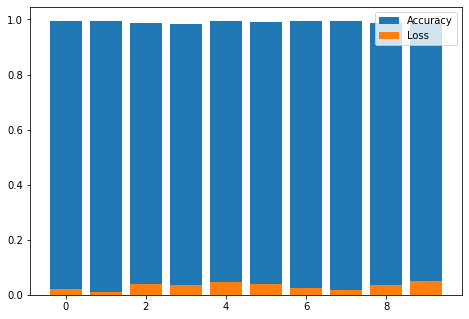

In [165]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar([i for i in range(10)], accuracy)
ax.bar([i for i in range(10)], loss)

ax.legend(labels=['Accuracy', 'Loss'])
plt.show()

### III- Create different tasks from the MNIST dataset (2 points)

Split `Tr` into 3 datasets (tasks) according to the following distribution.

- Task 1 contains digits of classes 0, 1, and 2. 
- Task 2 contains classes 3, 4, and 5. 
- Task 3 contains classes 6, 7, 8, and 9.
 
*The following picture showcases the general scheme*
<center>
<img src='https://drive.google.com/uc?id=1vdDgdN9BGQ2Jl3Yg4YiPvfb5fcAeJZJ-' style="width:500px;"> 
</center>


In [142]:
X_org = scale_image(X_org)
y_org = keras.utils.to_categorical(y_org, num_classes)

In [148]:
X_classwise, y_classwise = seperate_classes(X_org, y_org)

X_task1 = np.append(X_classwise[0], X_classwise[1], axis=0)
X_task1 = np.append(X_task1, X_classwise[2], axis=0)
y_task1 = np.append(y_classwise[0], y_classwise[1], axis=0)
y_task1 = np.append(y_task1, y_classwise[2], axis=0)

X_task2 = np.append(X_classwise[3], X_classwise[4], axis=0)
X_task2 = np.append(X_task2, X_classwise[5], axis=0)
y_task2 = np.append(y_classwise[3], y_classwise[4], axis=0)
y_task2 = np.append(y_task2, y_classwise[5], axis=0)

X_task3 = np.append(X_classwise[6], X_classwise[7], axis=0)
X_task3 = np.append(X_task3, X_classwise[8], axis=0)
X_task3 = np.append(X_task3, X_classwise[9], axis=0)
y_task3 = np.append(y_classwise[6], y_classwise[7], axis=0)
y_task3 = np.append(y_task3, y_classwise[8], axis=0)
y_task3 = np.append(y_task3, y_classwise[9], axis=0)

In [151]:
y_task1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [152]:
y_task2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [153]:
y_task3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### IV- Class-incremental learning implementation (8 points)

Using the different tasks (datasets) you created previously, implement a CNN for class incremental learning according to the following instructions. 
- The neural network architecture is not given, choose and tune your architecture following DNNs best practices. Similarly for the training no hyperparameters are given to you, you should choose them and justify your choice. Hyperparameter tuning is not mandatory but doing it would be a plus.
- Your network should have shared feature extractor (shared layers) part and separate classifier head (e.g., fully connected layers) for each task (see the figure below).
- When training on a new task, the shared layers part will get updated along with the head of the current task. 
- After training each task (Task 1 & 2), evaluate (and plot) the performances of the current and the previous tasks on `Te`.
    - Once the training on the last task is complete, test the model on `Te` and compare the performance of the network with the CNN trained in II, i.e., plot the `overall` and the `class-wise` performances for classical learning and incremental learning.

<center>
<img src='https://drive.google.com/uc?id=1HfwcMP7jGoJnYEMu7jDqloQNogEZsjrJ'  style="width:250px;"> 
</center>


i forgor 🥹

### V- Report (2 points)
Write a short report on the results you got and what you learned from this activity